# Metabolic Modeling in Microbial Community Engineering: A Case Study on Marine Coastal Oil Spills

Oil spills are among the most devastating environmental disasters, posing significant threats to marine ecosystems. The aftermath of such spills sees a surge in microbial communities capable of degrading the hydrocarbons present in the oil. These communities form intricate trophic networks, with various species playing specific roles in the degradation process.

In a recent study titled ["Harnessing the Potential of Native Microbial Communities for Bioremediation of Oil Spills in the Iberian Peninsula NW Coast"](https://www.frontiersin.org/articles/10.3389/fmicb.2021.633659/full), it was observed that oil spills lead to a drastic decrease in microbial diversity, with the enriched communities being dominated by hydrocarbon-degrading genera such as Alcanivorax, Pseudomonas, Acinetobacter, and others. These microbes possess the genetic potential to degrade a range of aromatic compounds, including toluene, a representative compound commonly found in oil spills.

Another study, ["Disentangling the microbial genomic traits associated with aromatic hydrocarbon degradation in a jet fuel-contaminated aquifer"](https://tmpfiles.org/dl/2982575/9e564aee-fb14-4a79-aa92-8ff63e9a2d6b.pdf), delves deeper into the metabolic pathways associated with hydrocarbon degradation. It proposes a metabolic model based on genome-centered analysis, functional predictions, and flux balance analysis (FBA) to describe the degradation process in jet-fuel-contaminated sites.

## Purpose of this Notebook

This Jupyter Notebook aims to utilize a community genome-scale metabolic model, incorporating the species identified in the aforementioned studies, to investigate the trophic network that emerges post a marine coastal oil spill. By focusing on toluene as a representative compound, we will explore how it is taken up and processed by the microbial community.

Through this exercise, we hope to:

1. **Understand the Dynamics**: Gain insights into the interactions and dynamics of microbial communities in response to oil spills.
2. **Highlight the Role of Metabolic Modeling**: Showcase the potential of metabolic modeling as a powerful tool in microbial community engineering.
3. **Provide a Framework**: Offer a structured approach for researchers and practitioners aiming to harness microbial communities for bioremediation purposes.

## The community and the environment

We will model a community of bacteria that are known to be involved in the degradation of toluene. The involved genera are:

- *Alcanivorax*
- *Pseudomonas*
- *Acinetobacter*
- *Marinobacter*
- *Thalassospira*
- *Pseudomonas*

As representatives of carbon sources that are commonly found in surface waters, we will use:

- *Glycogen*, which is the main storage polymer in cyanobacteria, and as much as [100-fold more abundant](https://ami-journals.onlinelibrary.wiley.com/doi/full/10.1111/1462-2920.14302) than other phytoplankton exudates, such as free monosaccharides or amino acids. 
- *Glycinebetaine*, which is [highly abundant](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9321204/) in marine environments.
- *D-Xylulose*, as representative of the degradation of microalgal polysaccharides.

Finally, as a representative of the oil spill, we will use *Toluene*, which is a major toxic component of crude oil.

In [37]:
import pandas as pd

medium = pd.read_csv('data/oilspill_medium.tsv', sep='\t', header=None)
medium.columns = ["reaction", "flux"]
# medium.set_index('reaction', inplace=True)
medium.head()

,reaction,flux
0,EX_ca2_m,0.00252
1,EX_cl_m,10.00001
2,EX_co2_m,10.00001
3,EX_cobalt2_m,10.00001
4,EX_cu2_m,10.00001


In [15]:
# from pathlib import Path
# import cobra

# # gem_dir = Path("/home/robaina/Databases/micom_carveme_genus/data")
# gem_dir = Path("models/")
# models = {}

# for file in gem_dir.glob("*.json"):
#     model_name = file.stem
#     model = cobra.io.load_json_model(file)
#     models[model_name] = model

## Building the community model

We will now build the community model out of the set of individual models corresponding to the different genera. To this end, we will employ micom's `build` workflow. The workflow will output a pickle file containing the community model, which we will use in the subsequent steps. If you like, you can skip this step and just take the pickle file containing the community model from the `data` folder.

In [24]:
import pandas as pd

taxo_df = pd.read_csv("data/micom_database.csv", sep=",", index_col=None)
taxo_df

,sample_id,id,abundance,file
0,oilspill,Acinetobacter_sp,100,models/Acinetobacter.json
1,oilspill,Alcanivorax_sp,100,models/Alcanivorax.json
2,oilspill,Alteromonas_sp,100,models/Alteromonas.json
3,oilspill,Flavobacterium_sp,100,models/Flavobacterium.json
4,oilspill,Marinobacter_sp,100,models/Marinobacter.json
5,oilspill,Oleibacter_sp,100,models/Oleibacter.json
6,oilspill,Polaribacter_sp,100,models/Polaribacter.json
7,oilspill,Pseudomonas_sp,100,models/Pseudomonas.json
8,oilspill,Rhodococcus_sp,100,models/Rhodococcus.json
9,oilspill,Thalassospira_sp,100,models/Thalassospira.json


In [10]:
from micom.workflows import build

manifest = build(taxonomy=taxo_df, model_db=None, out_folder="results/micom", cutoff=1e-2, threads=14 , solver="gurobi")
manifest

[10:33:09] WARNING  Found existing models for 1 samples. Will skip those. Delete the output folder if   ]8;id=207667;file:///home/robaina/miniconda3/envs/phycogem/lib/python3.11/site-packages/micom/workflows/build.py\build.py]8;;\:]8;id=325624;file:///home/robaina/miniconda3/envs/phycogem/lib/python3.11/site-packages/micom/workflows/build.py#95\95]8;;\
                    you would like me to rebuild them.                                                             

Output()

Read LP format model from file /tmp/tmp4a3qlu_d.lp
Reading time = 0.34 seconds
: 15669 rows, 49781 columns, 209395 nonzeros


,sample_id,abundance,file
0,oilspill,100,oilspill.pickle


In [25]:
from micom import load_pickle

cgem = load_pickle("results/micom/oilspill.pickle")
cgem

Read LP format model from file /tmp/tmpbl59teco.lp
Reading time = 0.12 seconds
: 15669 rows, 49781 columns, 209395 nonzeros


Name,oilspill
Memory address,7fcbe4dc4190
Number of metabolites,15658
Number of reactions,24890
Number of genes,11823
Number of groups,0
Objective expression,1.0*community_objective
Compartments,"C_c__Acinetobacter_sp, C_p__Acinetobacter_sp, C_e__Acinetobacter_sp, m, C_c__Alcanivorax_sp, C_e__Alcanivorax_sp, C_p__Alcanivorax_sp, C_c__Alteromonas_sp, C_p__Alteromonas_sp, C_e__Alteromonas_sp, C_e__Flavobacterium_sp, C_p__Flavobacterium_sp, C_c__Flavobacterium_sp, C_c__Marinobacter_sp, C_p__Marinobacter_sp, C_e__Marinobacter_sp, C_c__Oleibacter_sp, C_p__Oleibacter_sp, C_e__Oleibacter_sp, C_c__Polaribacter_sp, C_p__Polaribacter_sp, C_e__Polaribacter_sp, C_c__Pseudomonas_sp, C_p__Pseudomonas_sp, C_e__Pseudomonas_sp, C_c__Rhodococcus_sp, C_p__Rhodococcus_sp, C_e__Rhodococcus_sp, C_c__Thalassospira_sp, C_p__Thalassospira_sp, C_e__Thalassospira_sp"


In [46]:
model_medium = {k: v for k, v in medium.set_index("reaction")["flux"].items() if k in cgem.exchanges}
cgem.medium = model_medium
cgem.optimize()

,abundance,growth_rate,reactions,metabolites
compartments,,,,
Acinetobacter_sp,0.1,0.003065,2904,1747
Alcanivorax_sp,0.1,0.000000,2005,1329
Alteromonas_sp,0.1,0.000000,2308,1509
Flavobacterium_sp,0.1,4.996805,2868,1679
Marinobacter_sp,0.1,0.000000,2761,1654
...,...,...,...,...
Polaribacter_sp,0.1,0.000000,1973,1311
Pseudomonas_sp,0.1,0.000000,3277,1869
Rhodococcus_sp,0.1,0.000000,2639,1548


In [63]:
sol = cgem.cooperative_tradeoff(fraction=0.5)
sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
Acinetobacter_sp,0.1,2.344503e-07,2904,1747
Alcanivorax_sp,0.1,6.856076e-07,2005,1329
Alteromonas_sp,0.1,8.609248e-07,2308,1509
Flavobacterium_sp,0.1,1.501721e-07,2868,1679
Marinobacter_sp,0.1,5.570940e-06,2761,1654
...,...,...,...,...
Polaribacter_sp,0.1,2.187110e-07,1973,1311
Pseudomonas_sp,0.1,3.999983e+00,3277,1869
Rhodococcus_sp,0.1,1.633897e-07,2639,1548


## Exploring community metabolite exchange fluxes

We will now use the community model to explore the metabolic interactions between the different species. To this end, we will use micom's `grow` workflow, which will simulate the growth of the community on the different carbon sources in the provided medium (including the pollutant toluene). To do so, the workflow will use the cooperative growth algorithm that we saw before, with a tradeoff parameter (between community and individual growth rates) of 0.5. The workflow will output an exchanges dataframe containing the fluxes of all metabolites exchanged between the different species. We will use this dataframe to visualize the metabolic interactions between the different species.

In [25]:
# from micom.workflows import grow

# res = grow(manifest, model_folder="results/micom/", medium=new_medium, tradeoff=0.5, threads=12)
# res.exchanges.to_csv("results/micom/exchanges.tsv", sep="\t")

## Identifying key metabolites and species in the community through sensitivity analysis

In the intricate web of microbial communities, the concept of `elasticity` offers a quantitative lens through which we can discern the relative responsiveness of metabolic reactions to changes in metabolite concentrations. Elasticity, in this context, is akin to a measure of metabolic sensitivity—it gauges how a small perturbation in a metabolite's level influences the velocity of an enzyme-catalyzed reaction. By examining the elasticities within a community's metabolic network, we can pinpoint key metabolites that act as critical control points, effectively dictating the flux of biochemical pathways. Similarly, we can identify influential community members whose metabolic activities are pivotal in shaping the community dynamics. These species often have a disproportionate impact on the community's overall metabolic landscape, making them prime targets for further analysis. Through elasticity analysis, we not only gain insight into the robustness and stability of the community but also uncover potential levers for modulating its behavior, paving the way for targeted interventions and engineered symbioses.

In [26]:
from micom.elasticity import elasticities


eps = elasticities(cgem, fraction=0.5, reactions=cgem.exchanges)
eps.head()

Output()

Output()

,reaction,taxon,effector,direction,elasticity,type
0,EX_glc__D_m,medium,EX_h_m,zero,0.000000,exchanges
1,EX_h2o_m,medium,EX_h_m,forward,19.788859,exchanges
2,EX_14glucan_m,medium,EX_h_m,zero,0.000000,exchanges
3,EX_h_m,medium,EX_h_m,reverse,1.000000,exchanges
4,EX_2pglyc_m,medium,EX_h_m,zero,0.000000,exchanges


The results table from the elasticity analysis provides insights into how the rates of specific reactions within a microbial community are influenced by changes in metabolite concentrations. The 'Reaction' column lists the biochemical reactions, while 'Taxon' indicates the associated microbe or environmental medium. 'Effector' refers to the metabolite impacting the reaction rate, and 'Direction' shows whether the reaction rate increases, decreases, or remains unchanged with effector concentration changes. The 'Elasticity' value quantifies this sensitivity, with higher values indicating greater responsiveness.

### Evaluating the effects of different taxa on toluene degradation

With the previusly calculated elasticities, we can assess the influence that increasing the abundance of specific taxa has on the community's uptake of toluene. By examining the elasticity values associated with toluene uptake, we can identify which microorganisms have a significant impact on this process. A positive elasticity value suggests that a higher abundance of the taxon leads to increased toluene uptake, while a negative value indicates the opposite. This investigation is crucial for understanding the role of each species in toluene metabolism and for potentially guiding the engineering of microbial communities for bioremediation or bioaugmentation purposes.

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('results/micom/elasticity_analysis.tsv', sep='\t')

# Filter rows related to toluene intake and taxa abundance
toluene_intake_effects = df[(df['reaction'] == 'EX_tol_m') & (df['type'] == 'abundance')]

# Print the results
toluene_intake_effects

       Unnamed: 0  reaction   taxon           effector direction  elasticity  \
8203         8203  EX_tol_m  medium   Acinetobacter_sp   reverse    0.290787   
8624         8624  EX_tol_m  medium     Alcanivorax_sp   reverse    3.861581   
9045         9045  EX_tol_m  medium     Alteromonas_sp   reverse   -5.203019   
9466         9466  EX_tol_m  medium  Flavobacterium_sp   reverse    0.608322   
9887         9887  EX_tol_m  medium    Marinobacter_sp   reverse    1.360368   
10308       10308  EX_tol_m  medium      Oleibacter_sp   reverse    1.766614   
10729       10729  EX_tol_m  medium    Polaribacter_sp   reverse    0.907652   
11150       11150  EX_tol_m  medium     Pseudomonas_sp   reverse    4.808788   
11571       11571  EX_tol_m  medium     Rhodococcus_sp   reverse    0.998081   
11992       11992  EX_tol_m  medium   Thalassospira_sp   reverse    3.510812   

            type  
8203   abundance  
8624   abundance  
9045   abundance  
9466   abundance  
9887   abundance  
10308

The results from the toluene intake effects analysis show how the abundance of different taxa in the community is influenced by the intake of toluene. This information is crucial for understanding the metabolic interactions within the microbial community and can help in predicting the community's response to changes in toluene levels.

We could design intervention strategies to optimize community uptake of toluene, either by directly reducing a particular taxon (e.g. through a taxon-specific virus) or by manipulating environmental conditions so they are less favorable to the competing taxon.


In [47]:
import pandas as pd


exchanges_df = pd.read_csv('results/micom/exchanges.tsv', sep='\t')
acinetobacter_imports = exchanges_df[(exchanges_df['taxon'] == 'Acinetobacter_sp') & (exchanges_df['direction'] == 'import')]
producers = exchanges_df[(exchanges_df['metabolite'].isin(acinetobacter_imports['metabolite'])) & (exchanges_df['direction'] == 'export')]
merged_df = pd.merge(acinetobacter_imports, producers, on='metabolite', suffixes=('_import', '_export'))
result_df = merged_df[['metabolite', 'flux_import', 'taxon_export', 'flux_export']]
result_df

,metabolite,flux_import,taxon_export,flux_export
0,pro__L_e,-0.039335,Alcanivorax_sp,0.170832
1,pro__L_e,-0.039335,Thalassospira_sp,0.049446
2,h2o2_e,-17.523853,Pseudomonas_sp,90.656167
3,h2o2_e,-17.523853,Alcanivorax_sp,54.020134
4,h2o2_e,-17.523853,Polaribacter_sp,50.000000
5,h2o2_e,-17.523853,Oleibacter_sp,68.031043
6,gly_e,-8.948290,Alcanivorax_sp,124.392349
7,gly_e,-8.948290,Thalassospira_sp,22.532202
8,gly_e,-8.948290,Marinobacter_sp,62.926482
9,pacald_e,-55.537896,Flavobacterium_sp,25.857210


## Computing community knockouts

We will now use micom's `community_knockout` workflow to compute the effect of knocking out each species in the community on the community's growth rate. The workflow will output a dataframe containing the growth rate of the community when each species is knocked out. We will use this dataframe to visualize the effect of knocking out each species on the community's growth rate.

In [27]:
ko = cgem.knockout_taxa(fraction=1.0)
ko.index.name = "KO"
ko[ko.abs() < 1e-6] = 0
ko.to_csv('results/micom/ko_analysis.tsv', sep='\t')
# ko = pd.read_csv('results/micom/ko_analysis.tsv', sep='\t', index_col="KO")
ko

Output()

/home/robaina/miniconda3/envs/phycogem/lib/python3.11/site-packages/micom/problems.py:138: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ko = pd.DataFrame(results, index=taxa).drop("medium", 1)


compartments,Acinetobacter_sp,Alcanivorax_sp,Alteromonas_sp,Flavobacterium_sp,Marinobacter_sp,Oleibacter_sp,Polaribacter_sp,Pseudomonas_sp,Rhodococcus_sp,Thalassospira_sp
Acinetobacter_sp,-0.009712,1.664889e-07,6.440431e-07,-0.008417,0.002818,7.779873e-08,0.000001,0.006302,-6.397623e-06,0.008960
Alcanivorax_sp,-0.000747,-6.458205e-07,2.088218e-06,-0.000590,0.000023,7.534752e-07,-0.000011,0.001175,6.161070e-05,0.000035
Alteromonas_sp,0.000188,-8.368071e-08,-1.375545e-06,0.000060,0.000005,4.629987e-08,0.000005,-0.000375,4.445484e-05,0.000015
Flavobacterium_sp,0.000178,1.523247e-06,3.900969e-06,-4.433410,4.228838,1.901821e-06,0.745622,-0.556812,-1.383952e-05,0.000086
Marinobacter_sp,0.000264,-6.458205e-07,-6.385213e-07,-4.433163,-0.000015,-5.773374e-07,0.000010,4.307085,-4.124120e-07,0.000009
Oleibacter_sp,-0.000730,8.527319e-07,1.651379e-06,0.002235,0.000016,-5.773374e-07,0.000069,-0.001735,5.221512e-05,0.000033
Polaribacter_sp,0.000122,-2.084561e-07,-2.491095e-07,0.004646,0.000005,-8.487383e-08,-0.000035,-0.004881,7.097483e-05,0.000015
Pseudomonas_sp,0.000282,-6.458205e-07,-1.375545e-06,0.231023,0.232848,-5.773374e-07,-0.000020,-0.556830,8.450847e-02,-0.000016
Rhodococcus_sp,-0.000327,8.182949e-07,3.283673e-06,-0.000557,0.000018,9.569918e-07,0.000159,0.000629,-2.902730e-05,0.000053
Thalassospira_sp,-0.000715,-6.458205e-07,-2.678593e-07,0.000118,-0.000007,-3.810049e-07,-0.000019,0.000597,-5.435672e-06,-0.000016


## Plot ecological interaction graph

Let's us visualize the community KO analysis with an ecological interaction graph. In this graph, blue edges represent a positive or cooperative effect between taxa (i.e., an increase in abundance of one taxon is followed by an increase in the growth rate of the other taxon), while red edges represent a negative or competitive effect (i.e., an increase in abundance of one taxon is followed by a decrease in the growth rate of the other taxon). The thickness of the edges is proportional to the magnitude of the effect.

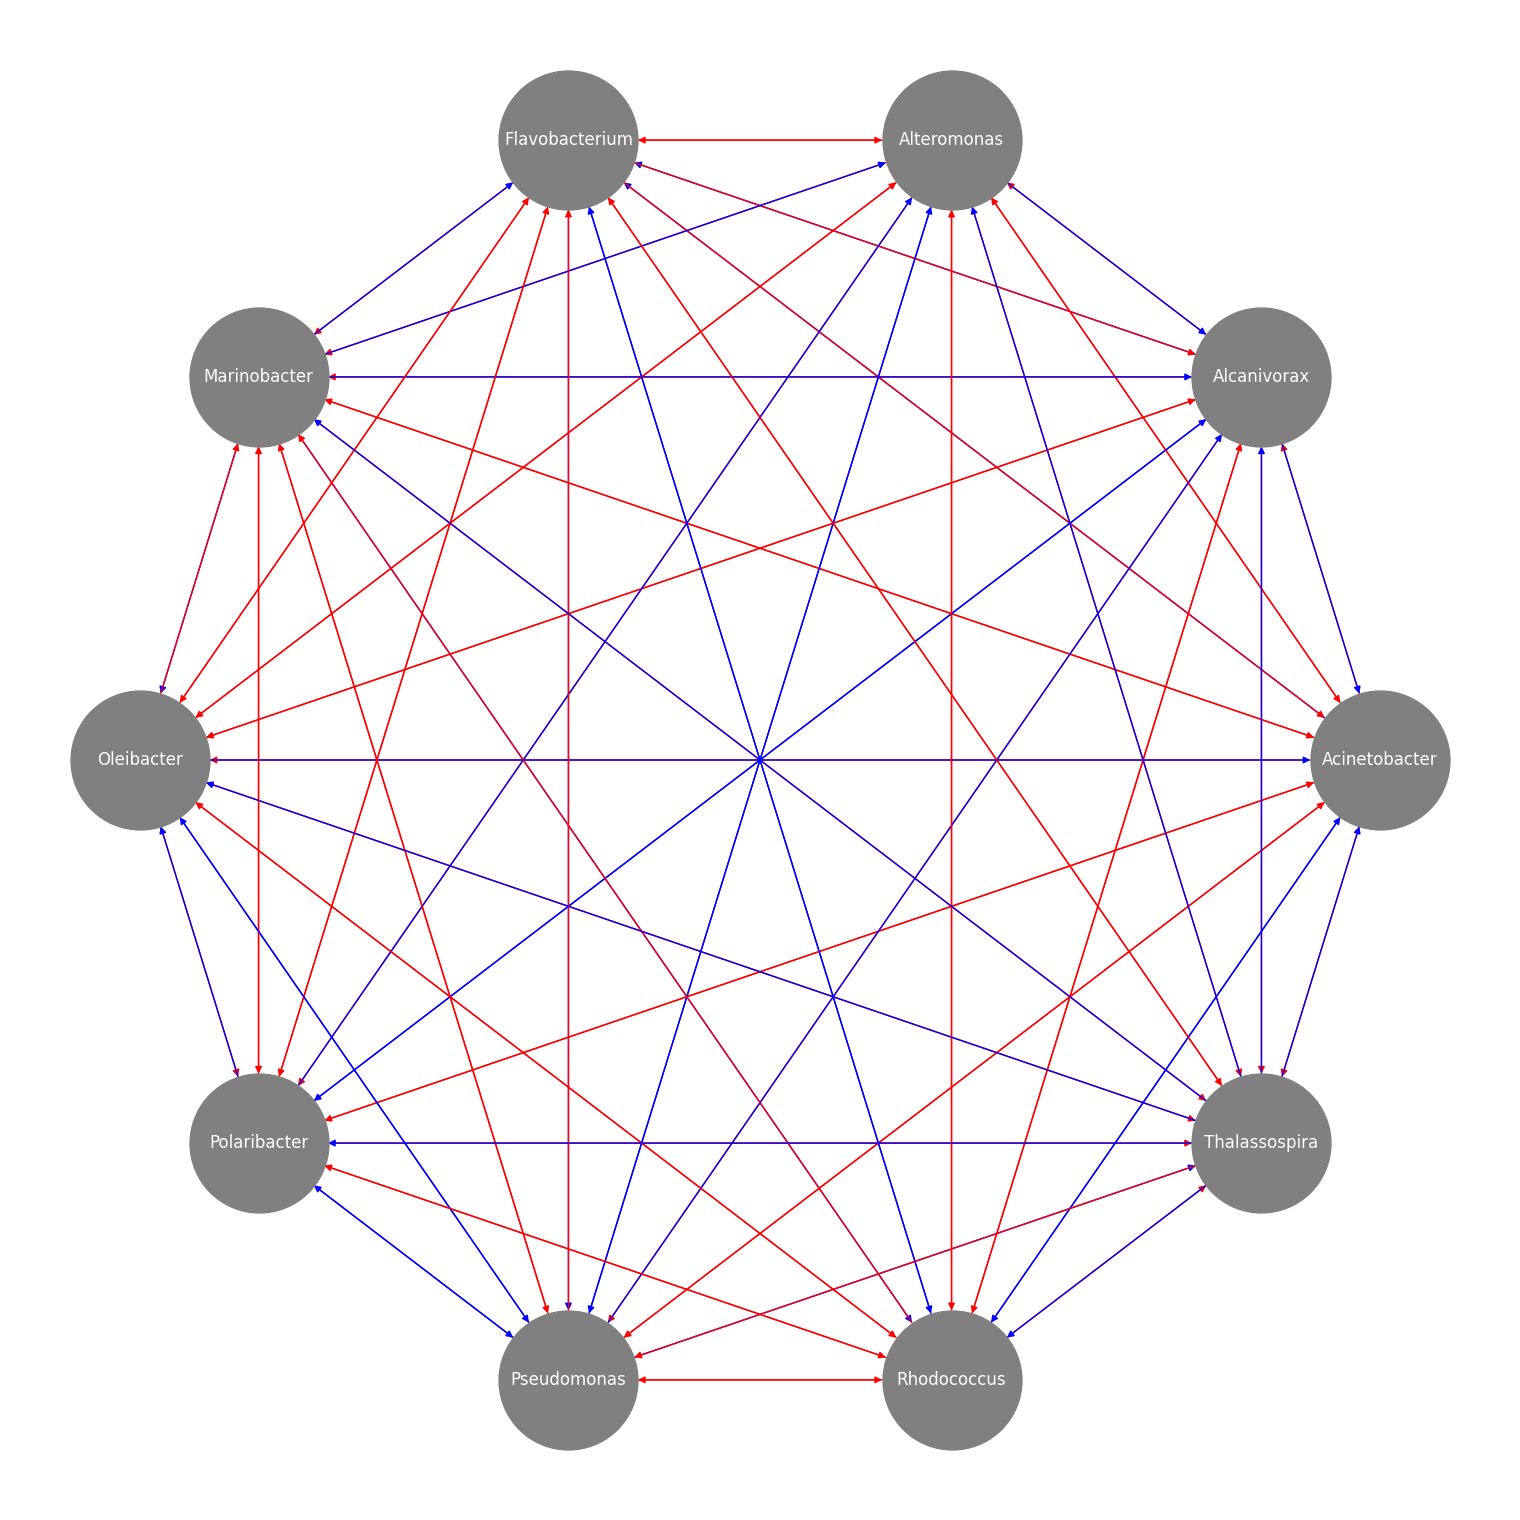

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for taxon in ko.columns:
    G.add_node(taxon)

# Add edges
for taxon1 in ko.columns:
    for taxon2 in ko.columns:
        if taxon1 != taxon2:
            growth_change = ko.loc[taxon1, taxon2]
            if growth_change > 0:  # competitive interaction
                G.add_edge(taxon1, taxon2, color='red')
            elif growth_change < 0:  # collaborative interaction
                G.add_edge(taxon1, taxon2, color='blue')

# Draw the graph
colors = nx.get_edge_attributes(G, 'color').values()
pos = nx.circular_layout(G)

# Increase figure size
plt.figure(figsize=(15, 15))

# Increase node size, change node color to grey, and remove "_sp" from the node labels
node_labels = {node: node.replace("_sp", "") for node in G.nodes()}
nx.draw(G, pos, labels=node_labels, font_color='white', node_size=10000, node_color='grey', edge_color=colors)

# Show the graph
plt.show()

## Plot interaction graph

In [48]:
import pandas as pd

exchanges_df = pd.read_csv("results/micom/exchanges.tsv", sep="\t")
export_df = exchanges_df[exchanges_df["direction"] == "export"]
import_df = exchanges_df[exchanges_df["direction"] == "import"]
merged_df = pd.merge(import_df, export_df, on="metabolite", how="outer")
final_df = merged_df[["sample_id_x", "taxon_x", "taxon_y", "metabolite"]]
final_df.columns = ["sample_id", "donor", "receiver", "compound"]
final_df.loc[final_df["donor"].isnull(), "donor"] = None

final_df.head()

/tmp/ipykernel_49297/1454815240.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[final_df["donor"].isnull(), "donor"] = None


,sample_id,donor,receiver,compound
0,oilspill,medium,NaN,nh4_m
1,oilspill,medium,NaN,pi_m
2,oilspill,medium,NaN,tol_m
3,oilspill,medium,NaN,zn2_m
4,oilspill,medium,NaN,k_m


In [49]:
import networkx as nx
import json


def generate_bipartite_graph(exchanges_file_path: str, hide_taxa: list[str] = None, hide_metabolites: list[str] = None, flux_cutoff: float = None) -> nx.DiGraph:
    """
    Generates a bipartite graph from a file containing exchange data.

    Args:
        exchanges_file_path (str): The path to the file containing exchange data.
        hide_taxa (list[str], optional): A list of taxa to hide from the graph. Defaults to None.
        hide_metabolites (list[str], optional): A list of metabolites to hide from the graph. Defaults to None.
        flux_cutoff (float, optional): The minimum flux value for an edge to be included in the graph. Defaults to None.

    Returns:
        nx.DiGraph: The generated bipartite graph.
    """
    G = nx.DiGraph()

    with open(exchanges_file_path, 'r') as f:
        for line in f:
            if "taxon" in line:
                continue
            cols = line.strip().split('\t')
            taxon = cols[1].replace("_sp", "")
            metabolite = cols[7].replace("_e", "")
            direction = cols[8]
            flux = abs(float(cols[5]))
            if hide_taxa is None or taxon not in hide_taxa:
                G.add_node(taxon, bipartite=0)
            if hide_metabolites is None or metabolite not in hide_metabolites:
                G.add_node(metabolite, bipartite=1)
            if flux_cutoff is None or flux >= flux_cutoff:
                if direction == 'export':
                    G.add_edge(taxon, metabolite)
                elif direction == 'import':
                    G.add_edge(metabolite, taxon)

    if hide_taxa is not None:
        G.remove_nodes_from(hide_taxa)
    if hide_metabolites is not None:
        G.remove_nodes_from(hide_metabolites)

    G.remove_nodes_from(list(nx.isolates(G)))

    bipartite_graph = G
    data = nx.readwrite.json_graph.node_link_data(G)

    with open('results/micom/graph.json', 'w') as f:
        json.dump(data, f)

    return bipartite_graph


exchanges_file_path = "results/micom/exchanges.tsv"
# hidden_taxa = [
#     "medium", "Alcanivorax_sp", "Oleibacter_sp",
#     "Flavobacterium_sp", "Alteromonas_sp", "Rhodococcus_sp",
#     "Marinobacter_sp", "Thalassospira_sp", "Pseudomonas_sp",
#     ]
hidden_taxa = [
    "medium", "Alcanivorax", "Oleibacter",
    "Flavobacterium","Rhodococcus",
    ]
hidden_metabolites = ['h', 'h2', 'btn', 'ca2', 'cl', 'co2', 'cu2', 'fe2', 'fe3', 'k', 'no2', 'no3', 'so4', 'thm', 'zn2', 'pi', 'h2o', 'o2', 'cobalt2', 'nh4', 'hco3', 'mg2', 'mn2']

hidden_metabolites_extended = []
for metabolite in hidden_metabolites:
    hidden_metabolites_extended.append(metabolite + "_m")
    hidden_metabolites_extended.append(metabolite + "_e")

bipartite_graph = generate_bipartite_graph(
    exchanges_file_path,
    hide_taxa=hidden_taxa,
    hide_metabolites=hidden_metabolites, #_extended,
    flux_cutoff=0.0
    )

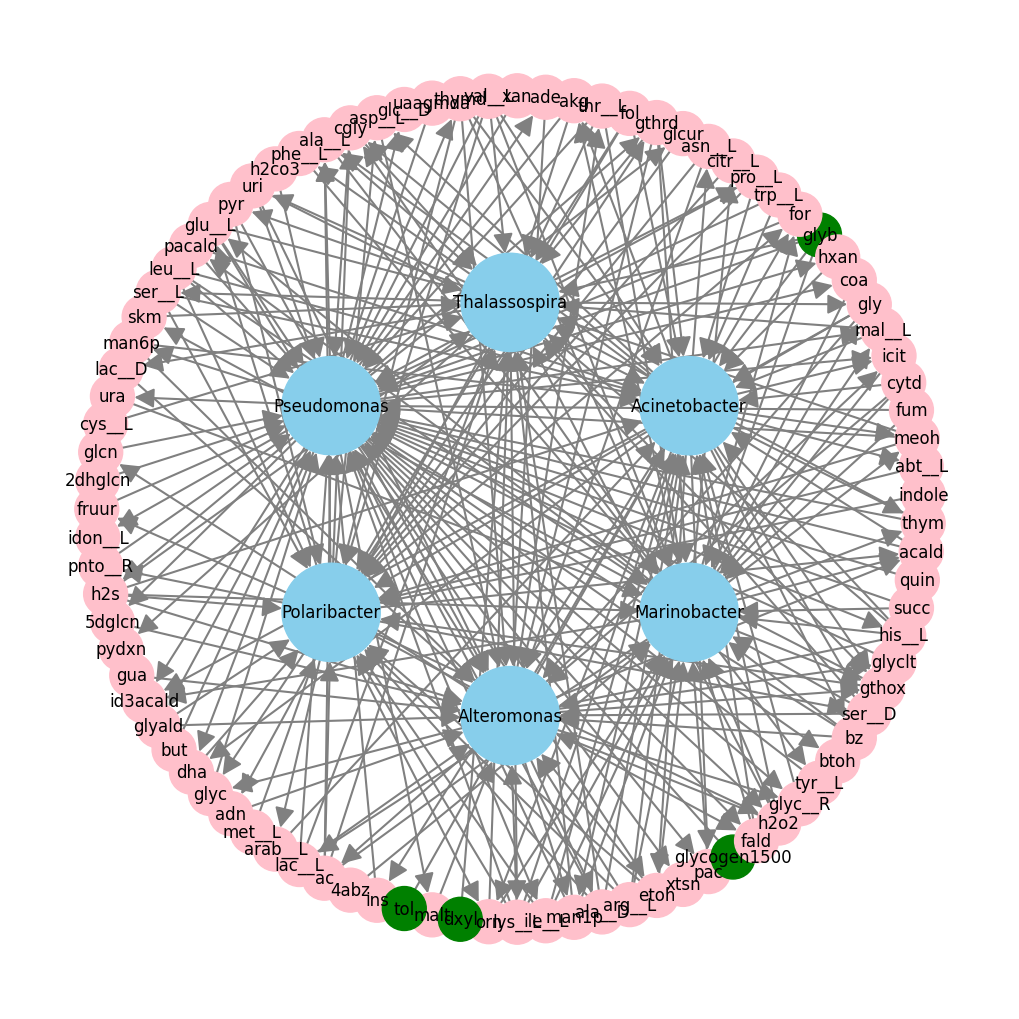

In [50]:
import networkx as nx
from matplotlib import pyplot as plt


large_node_size = 5000
small_node_size = 1000

# Identify the compounds for which "medium" is a donor
medium_donors = [
    m.replace("_m", "")
    for m in final_df[final_df["donor"] == "medium"]["compound"].unique()
]
node_colors = [
    'skyblue' if bipartite == 0 else 'green' if node in medium_donors else 'pink'
    for node, bipartite in nx.get_node_attributes(bipartite_graph, 'bipartite').items()
]

# Define the layout
shell_layout = nx.shell_layout(bipartite_graph, [set(n for n, d in bipartite_graph.nodes(data=True) if d['bipartite']==0), set(n for n, d in bipartite_graph.nodes(data=True) if d['bipartite']==1)])

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(
    bipartite_graph,
    shell_layout,
    with_labels=True,
    node_size=[
        large_node_size if bipartite == 0 else small_node_size
        for bipartite in nx.get_node_attributes(bipartite_graph, 'bipartite').values()
    ],
    node_color=node_colors,
    edge_color='gray',
    arrowsize=30,
    width=1.5
)
nx.draw_networkx_edge_labels(
    bipartite_graph,
    shell_layout,
    edge_labels=nx.get_edge_attributes(bipartite_graph, 'weight'),
)
plt.show()

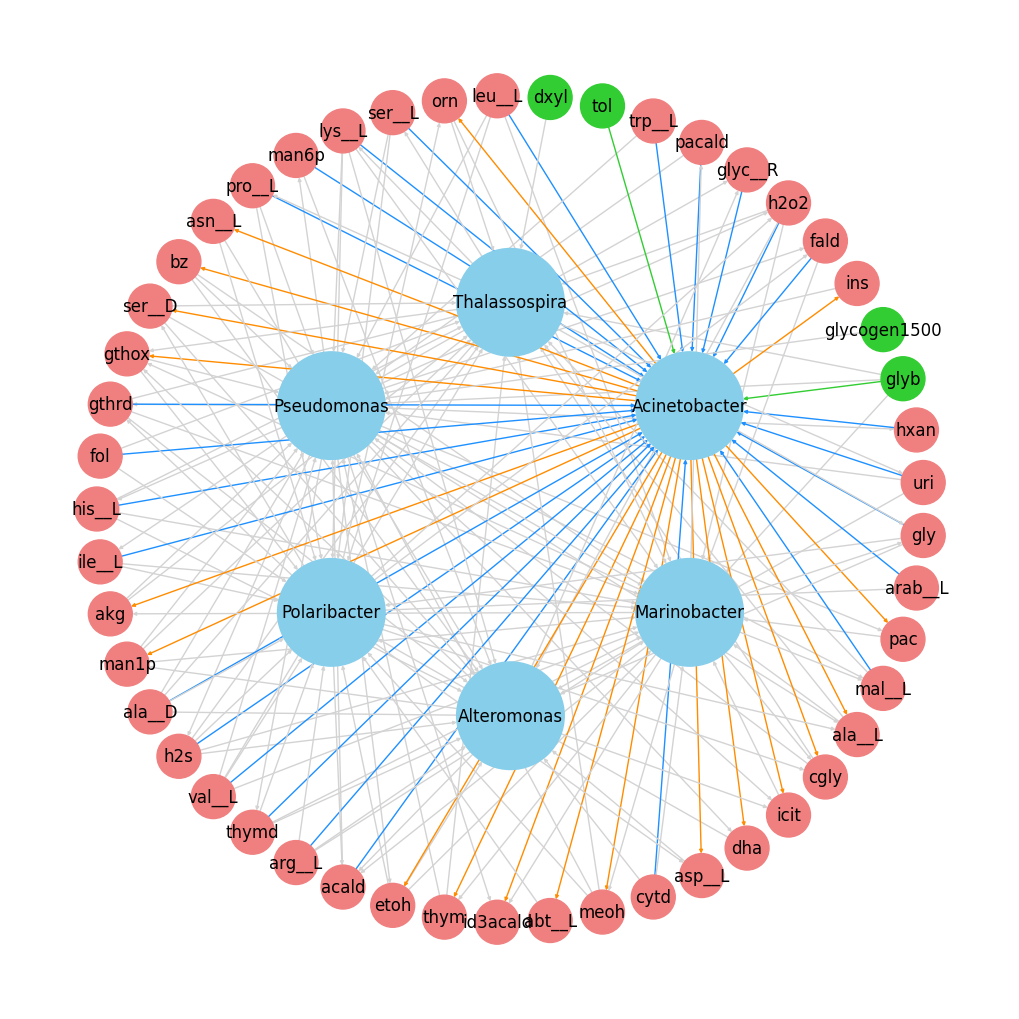

In [63]:
large_node_size = 6000
small_node_size = 1000

# Identify the compounds for which "medium" is a donor
medium_donors = [
    m.replace("_m", "")
    for m in final_df[final_df["donor"] == "medium"]["compound"].unique()
]

# Identify the nodes that are directly connected to toluene
direct_nodes = list(bipartite_graph.neighbors('tol')) + ["tol"]

# Identify the nodes that are indirectly connected to toluene
indirect_nodes = [
    neighbor
    for node in direct_nodes
    for neighbor in bipartite_graph.neighbors(node)
]

# Identify the nodes that are connected to the indirect nodes
indirect_nodes_extended = [
    neighbor
    for node in indirect_nodes
    for neighbor in bipartite_graph.neighbors(node)
]

# Convert the directed graph to an undirected graph
undirected_graph = bipartite_graph.to_undirected()

# Identify the compounds that are connected to Acinetobacter in the undirected graph
acinetobacter_compounds = [n for n in undirected_graph.neighbors('Acinetobacter') if undirected_graph.nodes[n]['bipartite'] == 1]


# Identify the species that are connected to these compounds
species_connected_to_acinetobacter_compounds = [
    n
    for compound in acinetobacter_compounds
    for n in bipartite_graph.neighbors(compound)
    if bipartite_graph.nodes[n]['bipartite'] == 0
]

# Create a subgraph that only includes the nodes identified above
subgraph_nodes = direct_nodes + indirect_nodes + indirect_nodes_extended + acinetobacter_compounds + species_connected_to_acinetobacter_compounds
subgraph = bipartite_graph.subgraph(subgraph_nodes)

# Identify the taxa nodes that are connected to the medium donors
medium_donor_edges = [
    (u, v)
    for u, v in bipartite_graph.edges()
    if u in medium_donors and bipartite_graph.nodes[v]['bipartite'] == 0
]

# Create a new graph that includes the nodes and edges of the subgraph, as well as the medium donor edges
extended_subgraph = nx.DiGraph(subgraph)

# Add the medium donor edges to the extended subgraph
extended_subgraph.add_edges_from(medium_donor_edges)

# Assign all nodes missing the 'bipartite' attribute to class 1 (compound)
for node in extended_subgraph.nodes():
    if 'bipartite' not in extended_subgraph.nodes[node]:
        extended_subgraph.nodes[node]['bipartite'] = 1

# Define the layout for the extended subgraph
shell_layout_extended_subgraph = nx.shell_layout(
    extended_subgraph,
    [
        set(n for n, d in extended_subgraph.nodes(data=True) if d['bipartite'] == 0),
        set(n for n, d in extended_subgraph.nodes(data=True) if d['bipartite'] == 1)
    ]
)

# Draw the extended subgraph
plt.figure(figsize=(10, 10))

# Define edge colors
edge_colors = []
for u, v in extended_subgraph.edges():
    if u == 'Acinetobacter':
        if extended_subgraph.nodes[v]['bipartite'] == 0:
            edge_colors.append('dodgerblue')  # color for imports to Acinetobacter
        else:
            edge_colors.append('darkorange')  # color for exports from Acinetobacter
    elif v == 'Acinetobacter':
        if u in medium_donors:
            edge_colors.append('limegreen')  # color for edges from carbon sources to Acinetobacter
        elif extended_subgraph.nodes[u]['bipartite'] == 0:
            edge_colors.append('darkorange')  # color for exports to Acinetobacter
        else:
            edge_colors.append('dodgerblue')  # color for imports from Acinetobacter
    else:
        edge_colors.append('lightgrey')  # color for all other edges

nx.draw(
    extended_subgraph,
    shell_layout_extended_subgraph,
    with_labels=True,
    node_size=[
        large_node_size if bipartite == 0 else small_node_size
        for bipartite in nx.get_node_attributes(extended_subgraph, 'bipartite').values()
    ],
    node_color=[
        'skyblue' if bipartite == 0 else 'limegreen' if node in medium_donors else 'lightcoral'
        for node, bipartite in nx.get_node_attributes(extended_subgraph, 'bipartite').items()
    ],
    edge_color=edge_colors,
    arrowsize=5,
    width=1.0
)
nx.draw_networkx_edge_labels(
    extended_subgraph,
    shell_layout_extended_subgraph,
    edge_labels=nx.get_edge_attributes(extended_subgraph, 'weight'),
)
plt.show()

## Simplifying the graph

Constructing  an interactive graph looks too complex. Instead, we could color-highlight edges directly connecting toluene to Acinetobacter and all the intermediaries that are taken up by Acinetobacter coming from the community. We could generate several graphs by changing some conditions, such as the relative abundance of Acinetobacter (e.g. because population increases after consuming toluene).